In [90]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Import the data 

In [44]:
data_cleaned3=pd.read_csv("cleaned_data.csv")
data_airport=pd.read_csv("airports.csv")

In [45]:
# Filter out  and rename the necessary columns

In [46]:
data_cleaned3=data_cleaned3.loc[: ,["Origin" , "Month" , "Year" , "Dest"] ]

In [47]:
data_airport=data_airport.loc[: , ["iata" , "state"]]

In [48]:
data_airport["Origin"] = data_airport["iata"]

In [49]:
# Merge the dataset on the origin column

In [50]:
merged_data2 = pd.merge(data_airport , data_cleaned3 , on="Origin")

In [51]:
merged_data2.head()

,iata,state,Origin,Month,Year,Dest
0,ABE,PA,ABE,1,2006,CLT
1,ABE,PA,ABE,1,2006,CLT
2,ABE,PA,ABE,1,2006,CLT
3,ABE,PA,ABE,1,2006,CLT
4,ABE,PA,ABE,1,2006,CLT


In [52]:
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14268928 entries, 0 to 14268927
Data columns (total 6 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   iata    object
 1   state   object
 2   Origin  object
 3   Month   int64 
 4   Year    int64 
 5   Dest    object
dtypes: int64(2), object(4)
memory usage: 762.0+ MB


In [1]:
#change the month and year type to string 

In [54]:
merged_data2["Year"]= merged_data2["Year"].astype(str)
merged_data2["Month"] = merged_data2["Month"].astype(str)

In [55]:
#make month in the month format having two integers
merged_data2["Month"]=merged_data2["Month"].apply(lambda x : str(x).zfill(2) if len(x)==1 else x )

In [3]:
#Join the year and month and make it to the date-time format.

In [56]:
merged_data2["Year-Month"]=pd.to_datetime(merged_data2["Year"].astype(str) + "-" + merged_data2["Month"].astype(str) , format = "%Y-%m")

In [57]:
merged_data2["Year-Month"]=merged_data2["Year-Month"] .dt.to_period("M")

In [6]:
#Group the data based on Year-Month and get the size of each group
#The size of the group is considered as the count of the flights

In [58]:
grouped_data1= merged_data2.groupby("Year-Month").size().reset_index()

In [59]:
grouped_data1["count_of_the_flights"] = grouped_data1[0]

In [60]:
grouped_data1[["Year-Month" , "count_of_the_flights"]]

,Year-Month,count_of_the_flights
0,2006-01,569594
1,2006-02,518152
2,2006-03,595975
3,2006-04,577146
4,2006-05,594110
5,2006-06,585660
6,2006-07,607881
7,2006-08,616497
8,2006-09,573179
9,2006-10,598567


In [61]:
import matplotlib.pyplot as plt

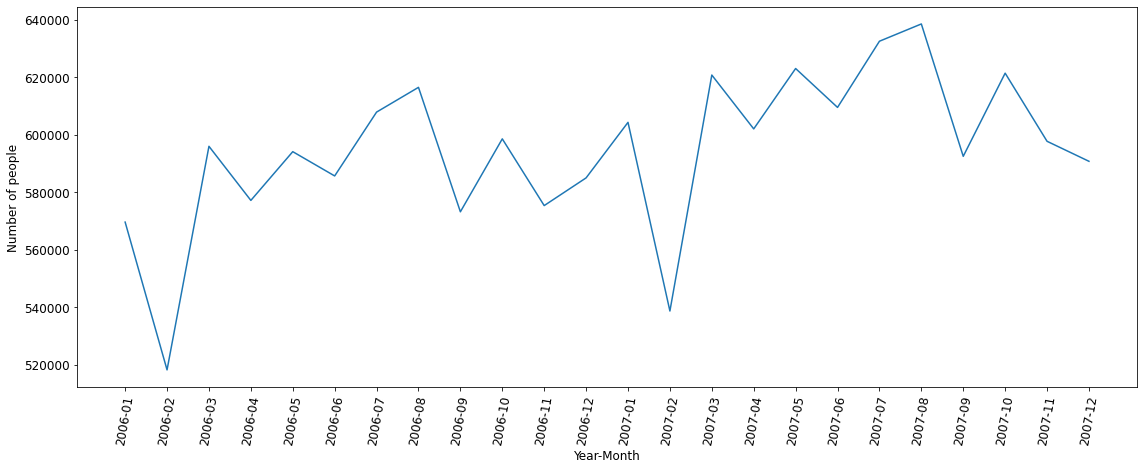

In [62]:
#plot a lineplot
f , ax = plt.subplots(figsize=(19,7))
ax= sns.lineplot(data=grouped_data1 , x=grouped_data1["Year-Month"].astype(str) , y=grouped_data1["count_of_the_flights"] )
ax.tick_params("x" , rotation = 80 , labelsize=12)
ax.tick_params("y" , labelsize="12")
ax.set_xlabel("Year-Month" , size=12)
ax.set_ylabel("Number of people" , size=12)
plt.show()

In [63]:
#number of people travelling from a particular origin to a particular destination
merged_data2["Origin-Dest"]=merged_data2["Origin"] +"-" + merged_data2["Dest"]

In [64]:
merged_data2

,iata,state,Origin,Month,Year,Dest,Year-Month,Origin-Dest
0,ABE,PA,ABE,01,2006,CLT,2006-01,ABE-CLT
1,ABE,PA,ABE,01,2006,CLT,2006-01,ABE-CLT
2,ABE,PA,ABE,01,2006,CLT,2006-01,ABE-CLT
3,ABE,PA,ABE,01,2006,CLT,2006-01,ABE-CLT
4,ABE,PA,ABE,01,2006,CLT,2006-01,ABE-CLT
...,...,...,...,...,...,...,...,...
14268923,YUM,AZ,YUM,12,2007,SLC,2007-12,YUM-SLC
14268924,YUM,AZ,YUM,12,2007,LAX,2007-12,YUM-LAX
14268925,YUM,AZ,YUM,12,2007,IPL,2007-12,YUM-IPL
14268926,YUM,AZ,YUM,12,2007,LAX,2007-12,YUM-LAX


In [65]:
merged_data2=merged_data2.set_index("Year")

In [66]:
merged_data_2006=merged_data2.loc["2006" ,:]

In [77]:
merged_data_2006

,iata,state,Origin,Month,Dest,Year-Month,Origin-Dest
Year,,,,,,,
2006,ABE,PA,ABE,01,CLT,2006-01,ABE-CLT
2006,ABE,PA,ABE,01,CLT,2006-01,ABE-CLT
2006,ABE,PA,ABE,01,CLT,2006-01,ABE-CLT
2006,ABE,PA,ABE,01,CLT,2006-01,ABE-CLT
2006,ABE,PA,ABE,01,CLT,2006-01,ABE-CLT
...,...,...,...,...,...,...,...
2006,YUM,AZ,YUM,12,LAX,2006-12,YUM-LAX
2006,YUM,AZ,YUM,12,IPL,2006-12,YUM-IPL
2006,YUM,AZ,YUM,12,LAX,2006-12,YUM-LAX


In [81]:
merged_data_2006_new=merged_data_2006.groupby("Origin-Dest").size().sort_values(ascending=False).reset_index()

In [82]:
merged_data_2006_new["Number of people"]=merged_data_2006_new[0]

In [83]:
merged_data_2006_new[["Number of people" , "Origin-Dest"]]

,Number of people,Origin-Dest
0,14279,LAX-SAN
1,14256,SAN-LAX
2,13743,OGG-HNL
3,13689,HNL-OGG
4,13373,LAX-LAS
...,...,...
4647,1,JFK-LGA
4648,1,MDW-JFK
4649,1,GSO-ROA
4650,1,SYR-BTV


In [74]:
#filter out merged_data_2006 having only the Origin-Dest values which are part of the Top 5 number of people

In [84]:
merged_data_2006_f=merged_data_2006[(merged_data_2006["Origin-Dest"]=="LAX-SAN") | (merged_data_2006["Origin-Dest"]=="SAN-LAX") | (merged_data_2006["Origin-Dest"]=="OGG-HNL") | (merged_data_2006["Origin-Dest"]=="HNL-OGG") | (merged_data_2006["Origin-Dest"]=="LAX-LAS") ]

In [95]:
merged_data_2006_f

,iata,state,Origin,Month,Dest,Year-Month,Origin-Dest
Year,,,,,,,
2006,HNL,HI,HNL,01,OGG,2006-01,HNL-OGG
2006,HNL,HI,HNL,01,OGG,2006-01,HNL-OGG
2006,HNL,HI,HNL,01,OGG,2006-01,HNL-OGG
2006,HNL,HI,HNL,01,OGG,2006-01,HNL-OGG
2006,HNL,HI,HNL,01,OGG,2006-01,HNL-OGG
...,...,...,...,...,...,...,...
2006,SAN,CA,SAN,12,LAX,2006-12,SAN-LAX
2006,SAN,CA,SAN,12,LAX,2006-12,SAN-LAX
2006,SAN,CA,SAN,12,LAX,2006-12,SAN-LAX


In [98]:
merged_data_2006_f=merged_data_2006_f.groupby(["Year-Month" , "Origin-Dest"]). size () .reset_index()

In [99]:
merged_data_2006_f["Number of people"]= merged_data_2006_f[0]

In [104]:
merged_data_2006_f[[ "Year-Month" , "Number of people" , "Origin-Dest" ]]

,Year-Month,Number of people,Origin-Dest
0,2006-01,592,HNL-OGG
1,2006-01,1065,LAX-LAS
2,2006-01,1266,LAX-SAN
3,2006-01,606,OGG-HNL
4,2006-01,1267,SAN-LAX
5,2006-02,534,HNL-OGG
6,2006-02,979,LAX-LAS
7,2006-02,1118,LAX-SAN
8,2006-02,550,OGG-HNL
9,2006-02,1119,SAN-LAX


In [109]:
merged_data_2006_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   Year-Month        60 non-null     period[M]
 1   Origin-Dest       60 non-null     object   
 2   0                 60 non-null     int64    
 3   Number of people  60 non-null     int64    
dtypes: int64(2), object(1), period[M](1)
memory usage: 2.0+ KB


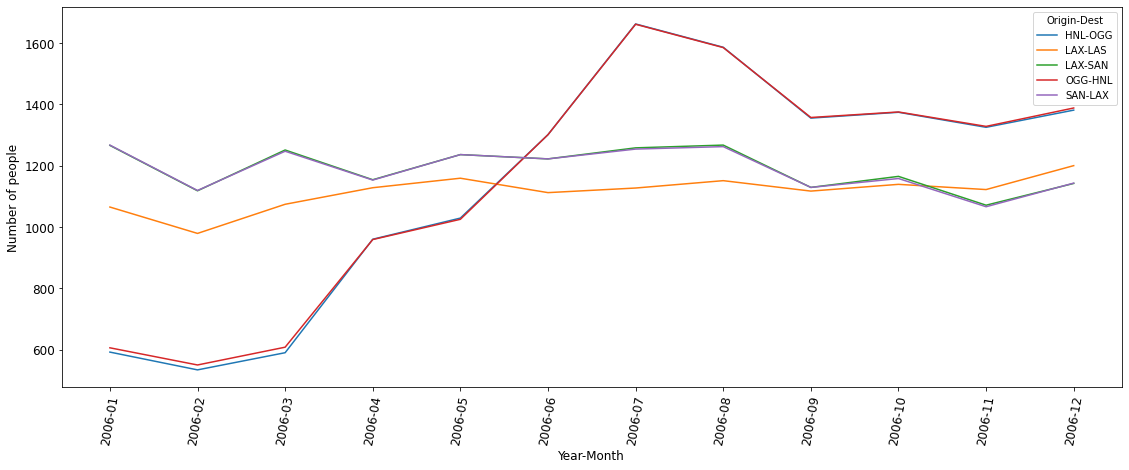

In [111]:
f , ax = plt.subplots(figsize=(19,7))
ax= sns.lineplot(data=merged_data_2006_f , x=merged_data_2006_f["Year-Month"].astype(str) , y=merged_data_2006_f["Number of people"] , hue ="Origin-Dest" )
ax.tick_params("x" , rotation = 80 , labelsize=12)
ax.tick_params("y" , labelsize="12")
ax.set_xlabel("Year-Month" , size=12)
ax.set_ylabel("Number of people" , size=12)
plt.show()

In [112]:
merged_data_2007=merged_data2.loc["2007" ,:]

In [113]:
merged_data_2007

,iata,state,Origin,Month,Dest,Year-Month,Origin-Dest
Year,,,,,,,
2007,ABE,PA,ABE,01,CLE,2007-01,ABE-CLE
2007,ABE,PA,ABE,01,CLE,2007-01,ABE-CLE
2007,ABE,PA,ABE,01,CLE,2007-01,ABE-CLE
2007,ABE,PA,ABE,01,CLE,2007-01,ABE-CLE
2007,ABE,PA,ABE,01,CLE,2007-01,ABE-CLE
...,...,...,...,...,...,...,...
2007,YUM,AZ,YUM,12,SLC,2007-12,YUM-SLC
2007,YUM,AZ,YUM,12,LAX,2007-12,YUM-LAX
2007,YUM,AZ,YUM,12,IPL,2007-12,YUM-IPL


In [117]:
merged_data_2007_new=merged_data_2007.groupby("Origin-Dest").size().sort_values(ascending=False).reset_index()

In [118]:
merged_data_2007_new["Number of people"]=merged_data_2007_new[0]

In [119]:
merged_data_2007_new[["Origin-Dest" , "Number of people"]]

,Origin-Dest,Number of people
0,OGG-HNL,15920
1,HNL-OGG,15712
2,LAX-LAS,14120
3,LAS-LAX,13575
4,HNL-LIH,13093
...,...,...
5027,PVD-BOS,1
5028,ACY-MYR,1
5029,FWA-CVG,1
5030,MKE-MKC,1


In [ ]:
#filter out merged_data_2006 having only the Origin-Dest values which are part of the highest 5 number of people

In [120]:
merged_data_2007_f=merged_data_2007[(merged_data_2007["Origin-Dest"]=="OGG-HNL") | (merged_data_2007["Origin-Dest"]=="HNL-OGG") | (merged_data_2007["Origin-Dest"]=="LAX-LAS") | (merged_data_2007["Origin-Dest"]=="LAS-LAX") | (merged_data_2007["Origin-Dest"]=="HNL-LIH") ]

In [121]:
merged_data_2007

,iata,state,Origin,Month,Dest,Year-Month,Origin-Dest
Year,,,,,,,
2007,ABE,PA,ABE,01,CLE,2007-01,ABE-CLE
2007,ABE,PA,ABE,01,CLE,2007-01,ABE-CLE
2007,ABE,PA,ABE,01,CLE,2007-01,ABE-CLE
2007,ABE,PA,ABE,01,CLE,2007-01,ABE-CLE
2007,ABE,PA,ABE,01,CLE,2007-01,ABE-CLE
...,...,...,...,...,...,...,...
2007,YUM,AZ,YUM,12,SLC,2007-12,YUM-SLC
2007,YUM,AZ,YUM,12,LAX,2007-12,YUM-LAX
2007,YUM,AZ,YUM,12,IPL,2007-12,YUM-IPL


In [122]:
merged_data_2007_f=merged_data_2007_f.groupby(["Year-Month" , "Origin-Dest"]). size () .reset_index()

In [127]:
merged_data_2007_f["Number of people"]= merged_data_2007_f[0]

In [128]:
merged_data_2007_f[[ "Year-Month" , "Number of people" , "Origin-Dest" ]]

,Year-Month,Number of people,Origin-Dest
0,2007-01,1158,HNL-LIH
1,2007-01,1346,HNL-OGG
2,2007-01,1134,LAS-LAX
3,2007-01,1198,LAX-LAS
4,2007-01,1394,OGG-HNL
5,2007-02,1027,HNL-LIH
6,2007-02,1209,HNL-OGG
7,2007-02,1023,LAS-LAX
8,2007-02,1078,LAX-LAS
9,2007-02,1252,OGG-HNL


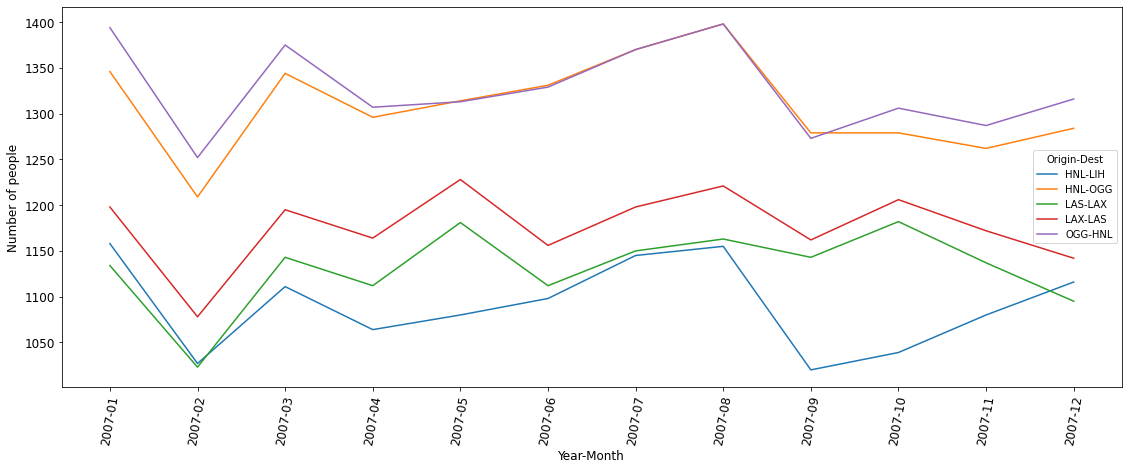

In [129]:
f , ax = plt.subplots(figsize=(19,7))
ax= sns.lineplot(data=merged_data_2007_f , x=merged_data_2007_f["Year-Month"].astype(str) , y=merged_data_2007_f["Number of people"] , hue ="Origin-Dest" )
ax.tick_params("x" , rotation = 80 , labelsize=12)
ax.tick_params("y" , labelsize="12")
ax.set_xlabel("Year-Month" , size=12)
ax.set_ylabel("Number of people" , size=12)
plt.show()